In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

![univerisal_theorem](https://cdn-images-1.medium.com/max/1600/1*YryNBGz5VYBOQ-2oZqesUA@2x.png)

![perceptron](https://www.allaboutcircuits.com/uploads/articles/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg)

![simple neural net](https://miro.medium.com/proxy/1*kQP-pGqSqX_zW6BQFsBh_A.png)

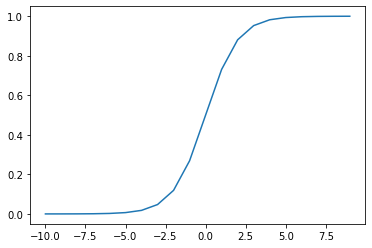

In [7]:
x = np.sort(np.random.randint(-10, 10, 100))
plt.plot(x, sigmoid(x));

- Feed forward
- Back probagation (Back prob): Graph computation

Problem:
- Vanishing: Trọng số không thể cập nhật
- Exploding: Trọng số cập nhật quá cao

In [28]:
import tensorflow
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Classification

In [12]:
data = load_iris()

In [13]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
features, labels =  data['data'], data['target']

In [19]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species_name'] = df.species.map({0:'setosa', 1: 'versicolor', 2: 'virginica'})

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


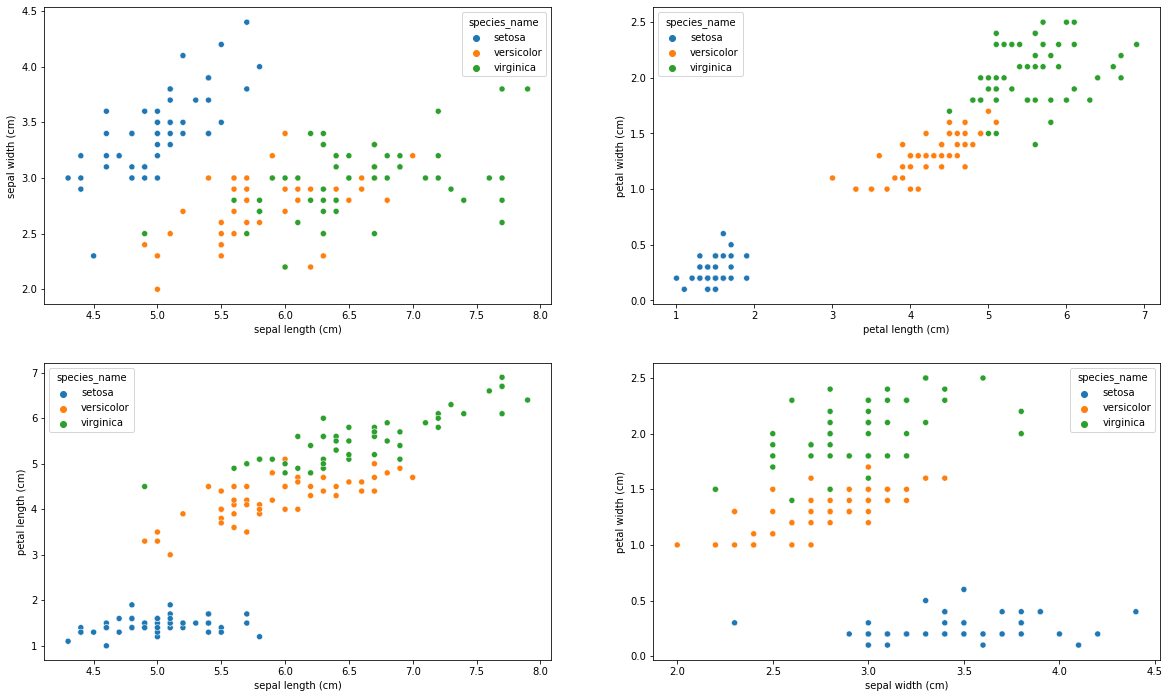

In [26]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_name', data=df)

plt.subplot(222)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species_name', data=df)

plt.subplot(223)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species_name', data=df)

plt.subplot(224)
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='species_name', data=df)

plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, shuffle=True, random_state=4)

In [32]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [34]:
X_test.shape, y_test.shape

((30, 4), (30,))

### Simple neural network

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(4,)))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples
Epoch 1/100
120/120 [==============================] - 1s 8ms/sample - loss: 2.2146 - accuracy: 0.2833
Epoch 2/100
120/120 [==============================] - 0s 272us/sample - loss: 1.9557 - accuracy: 0.2833
Epoch 3/100
120/120 [==============================] - 0s 266us/sample - loss: 1.7145 - accuracy: 0.2833
Epoch 4/100
120/120 [==============================] - 0s 385us/sample - loss: 1.5121 - accuracy: 0.2833
Epoch 5/100
120/120 [==============================] - 0s 269us/sample - loss:

In [64]:
print(classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.60      0.75         5
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.87      0.88        30
weighted avg       0.95      0.93      0.93        30



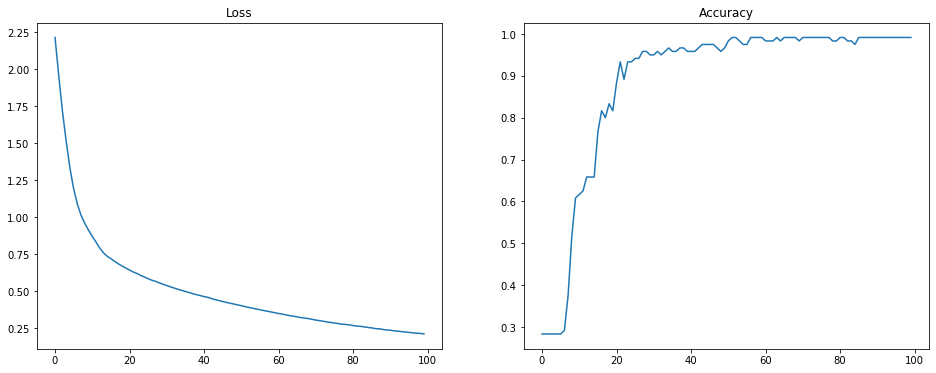

In [67]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.title('Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.show()